# EDA for Sales Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
df = pd.read_csv('../data/staging/cleaned_sales.csv')

##  Dataset Overview

In [4]:
df.shape

(421570, 14)

In [5]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Year              int64
Month             int64
Week              int64
DayOfWeek         int64
lag_1           float64
lag_7           float64
lag_30          float64
rolling_7       float64
rolling_30      float64
dtype: object

In [6]:
df.isnull().sum()

Store               0
Dept                0
Date                0
Weekly_Sales        0
IsHoliday           0
Year                0
Month               0
Week                0
DayOfWeek           0
lag_1            3331
lag_7           22774
lag_30          94138
rolling_7           0
rolling_30          0
dtype: int64

In [7]:
df.describe(include="all")

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week,DayOfWeek,lag_1,lag_7,lag_30,rolling_7,rolling_30
count,421570.000000,421570.000000,421570,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.0,418239.000000,398796.000000,327432.000000,421570.000000,421570.000000
unique,NaN,NaN,143,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2011-12-23,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3027,NaN,391909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.200546,44.260317,NaN,15981.258123,NaN,2010.968591,6.449510,25.826762,4.0,15999.603935,16099.542327,16271.321210,16003.789606,16010.794779
std,12.785297,30.492054,NaN,22711.183519,NaN,0.796876,3.243217,14.151887,0.0,22727.073873,22797.786216,22975.599611,22130.734437,21805.787017
min,1.000000,1.000000,NaN,-4988.940000,NaN,2010.000000,1.000000,1.000000,4.0,-4988.940000,-4988.940000,-4988.940000,-1750.000000,-1750.000000
25%,11.000000,18.000000,NaN,2079.650000,NaN,2010.000000,4.000000,14.000000,4.0,2090.030000,2146.485000,2286.587500,2180.777857,2318.534792
50%,22.000000,37.000000,NaN,7612.030000,NaN,2011.000000,6.000000,26.000000,4.0,7625.990000,7711.270000,7891.550000,7776.159286,8029.841167
75%,33.000000,74.000000,NaN,20205.852500,NaN,2012.000000,9.000000,38.000000,4.0,20226.575000,20370.070000,20505.390000,20372.897857,20396.862131


## Missing Values Heatmap

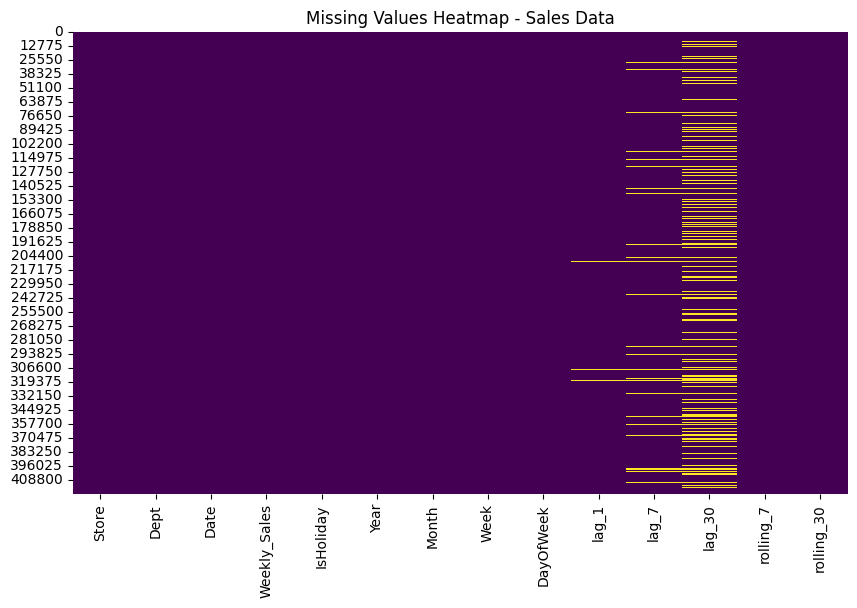

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap - Sales Data")
plt.show()

## Univariate Analysis - Weekly Sales Distribution

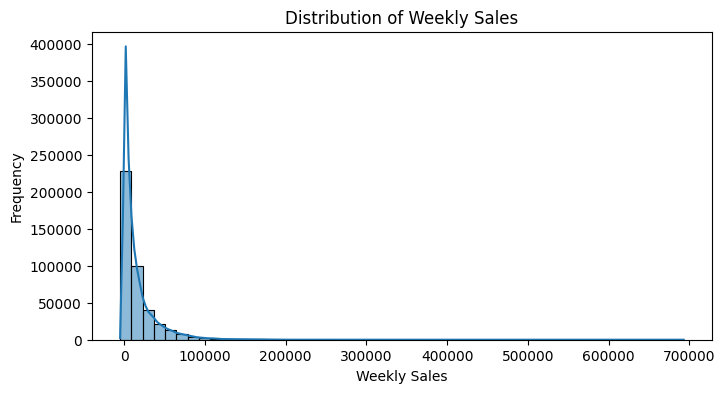

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(df["Weekly_Sales"], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()


## Time Series Trends

In [10]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

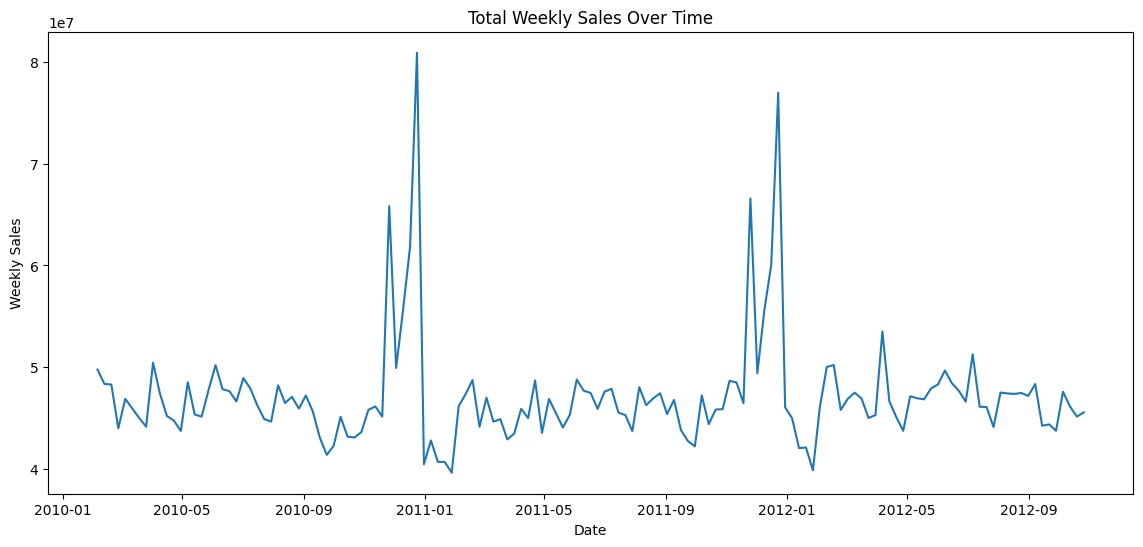

In [11]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df.groupby("Date")["Weekly_Sales"].sum())
plt.title("Total Weekly Sales Over Time")
plt.ylabel("Weekly Sales")
plt.show()

## Store-wise sales trends

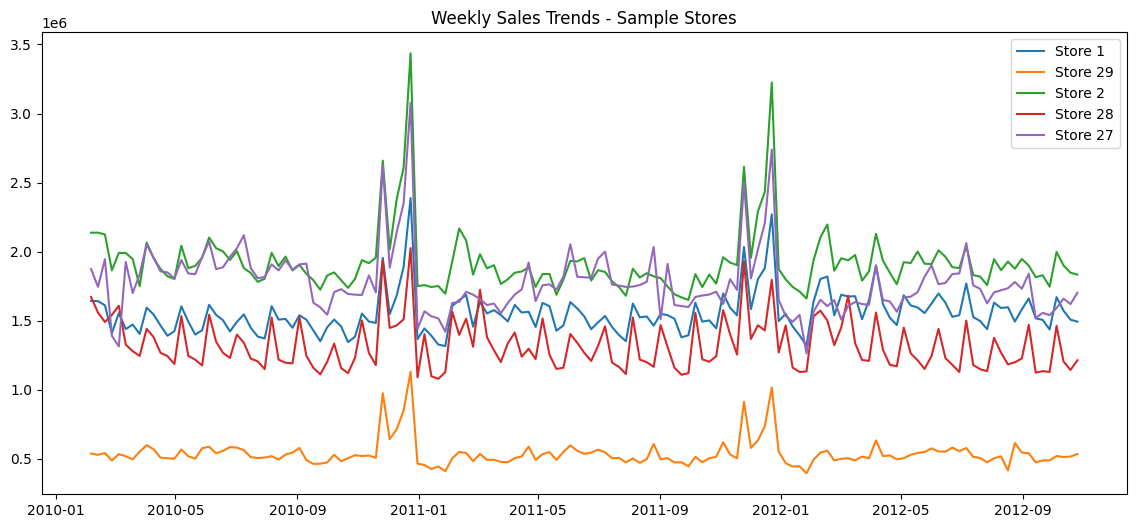

In [12]:
plt.figure(figsize=(14,6))
for store in df["Store"].unique()[:5]:  # show first 5 stores
    store_sales = df[df["Store"] == store].groupby("Date")["Weekly_Sales"].sum()
    plt.plot(store_sales.index, store_sales.values, label=f"Store {store}")
plt.legend()
plt.title("Weekly Sales Trends - Sample Stores")
plt.show()

## Holiday vs Non-Holiday Sales

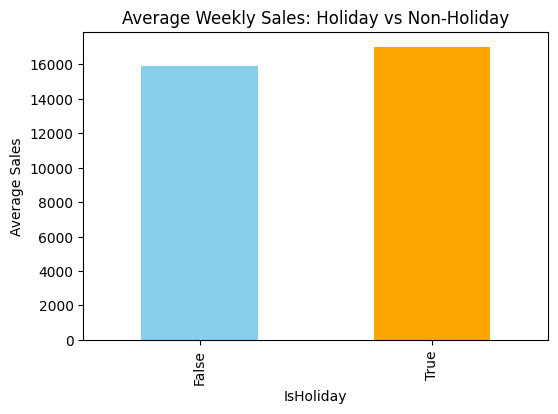

In [13]:
holiday_sales = df.groupby("IsHoliday")["Weekly_Sales"].mean()
holiday_sales.plot(kind="bar", figsize=(6,4), color=["skyblue","orange"])
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.ylabel("Average Sales")
plt.show()


## Store-Level Sales

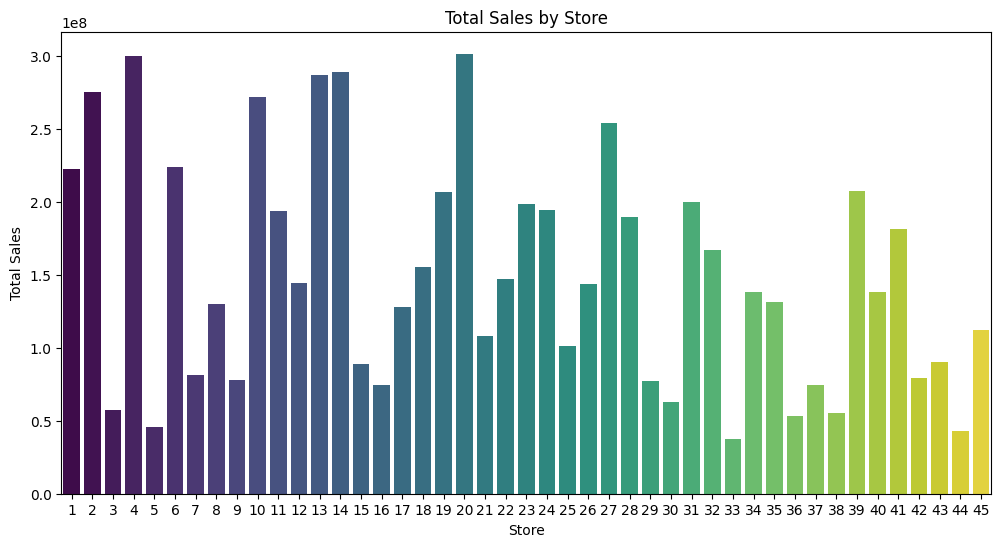

In [17]:
store_sales = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=store_sales.index, y=store_sales.values, hue = store_sales.index, legend = False, palette="viridis")
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()

##  Department-Level Sales

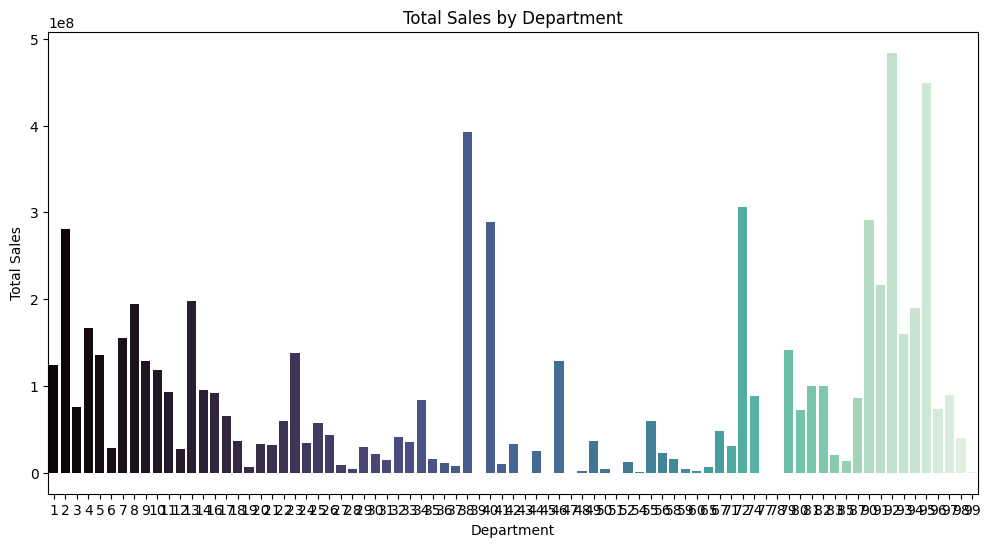

In [20]:
dept_sales = df.groupby("Dept")["Weekly_Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=dept_sales.index, y=dept_sales.values, hue = dept_sales.index, legend = False, palette="mako")
plt.title("Total Sales by Department")
plt.xlabel("Department")
plt.ylabel("Total Sales")
plt.show()

## EDA Overview

- Overview → shape, dtypes, missing values, summary statistics.

- Missing Values Heatmap → check for gaps.

- Univariate Analysis → distribution of Weekly Sales.

- Bivariate Analysis → correlation between numeric columns.

- Time Series Trends → sales over time (overall + per store).

- Holiday Impact → compare sales on holidays vs non-holidays.

- Store & Department Analysis → top stores, top departments, variation.